## Intro to Business Analytics Assignment 1

### Contributors
- Stanisław Howard
- Alexis Van den Heede, s231860
- Matthias Van Mechelen


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/Trips_2018.csv')

In [3]:
df_copy = df.copy()
df.head()

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1
1,1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1
2,2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1
3,3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1
4,4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1


In [4]:
# rerun this to save time if you make a typo and need original df again
df = df_copy.copy()

In [5]:
# col 0 is unnamed, change name to trip_id convert column to index
df.rename(columns={'Unnamed: 0':'trip_id'}, inplace=True)
df.set_index('trip_id', inplace=True)
df.head()

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
trip_id,,,,,,,,,,,,,
0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1
1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1
2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1
3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1
4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1


In [6]:
#  convert start time and stop time to datetime objects
df['starttime'] = pd.to_datetime(df['starttime'], format="%Y-%m-%d %H:%M:%S.%f")
df['stoptime'] = pd.to_datetime(df['stoptime'], format="%Y-%m-%d %H:%M:%S.%f")
df.head()

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
trip_id,,,,,,,,,,,,,
0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1
1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1
2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1
3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1
4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1


In [7]:
# make user type dummy, get shape
df = pd.get_dummies(df, columns=['usertype'], dtype=int, drop_first=True)
print(df.shape)
df.head()


(17548339, 13)


,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,gender,usertype_Subscriber
trip_id,,,,,,,,,,,,,
0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,1992,1,1
1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,1969,1,1
2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,1956,1,1
3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,1974,1,1
4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,1992,1,1


In [8]:
# plotting coordinates
def plot_map(coords):
    plt.scatter(coords[:,0], coords[:,1], s=0.75)
    plt.ylabel('Latitude')
    plt.xlabel('Longitude')
    plt.show()

In [9]:
# get lat and long
coords = df[['start_station_longitude','start_station_latitude']].values
coords = np.unique(coords, axis=0)



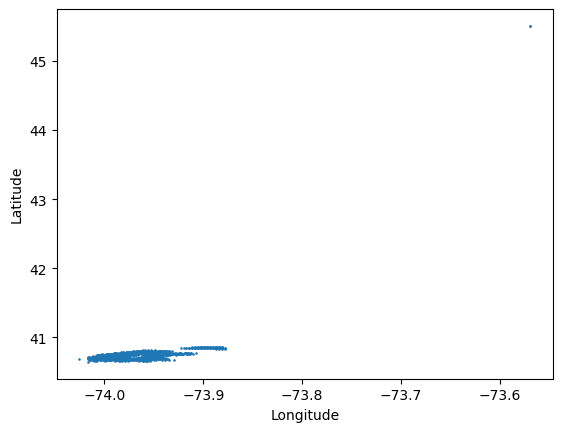

In [10]:
plot_map(coords)


Notice outlier (Canada, Montreal). quickly get rid of it to get an overview of the rest of the data. We will not yet delete the outlier datapoint from the dataframe.

In [11]:
# get rid of outlier longitude > -73.6
coords = coords[coords[:,0] < -73.6]
print(coords.shape) #shape is 917 here as it still includes the grid anomalies

(917, 2)


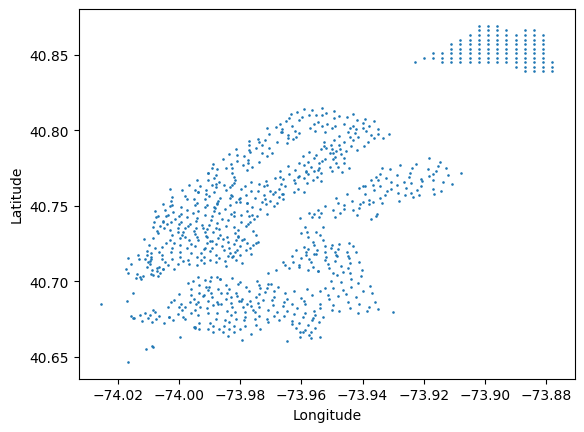

In [12]:
plot_map(coords)
# shows the unique start and end stations present in the dataset.

Notice very structured grid in top right corner. After investigation these data points were NaN's. We will rid of these data points, and at the same time we get rid of the canada outlier. 

In [13]:
# print where nan is in df, get rid of nan (= get rid of gridded outliers), create copy of df and start station coordinates
print(df.isnull().sum())
df = df[~np.isnan(df['start_station_id'])]
df = df[~np.isnan(df['end_station_id'])]
# get rid of Canada outlier
df = df[df['start_station_longitude'] < -73.6]
df = df[df['end_station_longitude'] < -73.6]
# get lat and long
coords_start = df[['start_station_longitude','start_station_latitude']].values
coords_start = np.unique(coords_start, axis=0)
coords_start_copy = coords_start.copy()
print(coords.shape)

tripduration                  0
starttime                     0
stoptime                      0
start_station_id           2497
start_station_latitude        0
start_station_longitude       0
end_station_id             2497
end_station_latitude          0
end_station_longitude         0
bikeid                        0
birth_year                    0
gender                        0
usertype_Subscriber           0
dtype: int64
(917, 2)


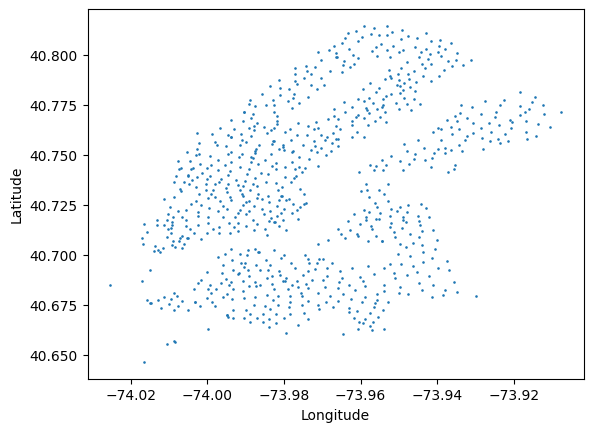

In [14]:
plot_map(coords_start)

In [15]:
# amount of distinct end stations does not match amount of start stations as seen from comparing shapes, create copy of end station coordinates.
coords_end = df[['end_station_longitude','end_station_latitude']].values
coords_end = np.unique(coords_end, axis=0)
print(coords_end.shape)
print(coords_start.shape)
coords_end_copy = coords_end.copy()


(849, 2)
(817, 2)


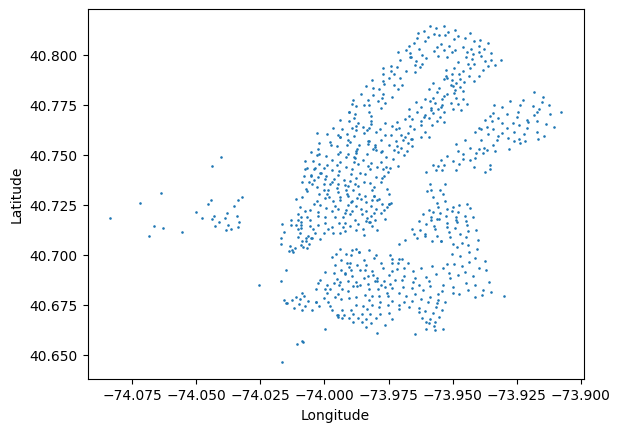

In [16]:
#what does the difference look like visually?
plot_map(coords_end)

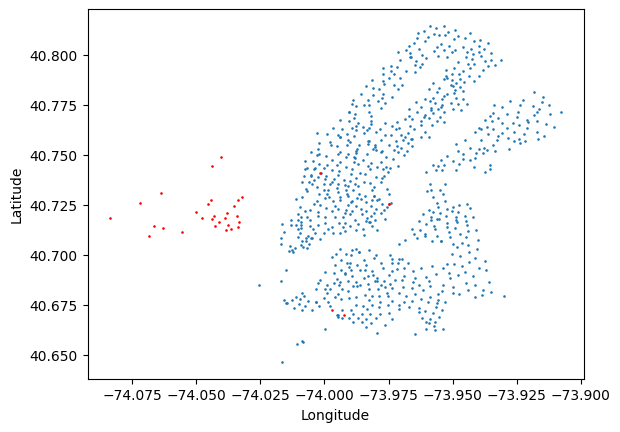

In [17]:
# highlight the end stations that are not in the start stations on the map of all en
coords_end_not_in_start = []
for i in range(len(coords_end)):
    if coords_end[i] not in coords_start:
        coords_end_not_in_start.append(coords_end[i])
coords_end_not_in_start = np.array(coords_end_not_in_start)
plt.scatter(coords_start[:,0], coords_start[:,1], s=0.75)
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.scatter(coords_end_not_in_start[:,0], coords_end_not_in_start[:,1], s=0.75, c='r')
plt.show()


Since there are more end stations than start stations and all start stations are also an end station, the clustering should be done using the end stations in order to cluster every station considered in the data. 

## Part 1
Clustering the stations

In [18]:
# import kmeans
from sklearn.cluster import KMeans

In [19]:
n_clusters = 20

In [20]:
# make kmeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(coords_end) # using coords here instead of df to increase speed

C:\Users\Matth\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Train on coords instead of DataFrame to increase speed, then predict to save labels on df, model is trained on same data as you predict the cluster for, so the cluster they belong to will be the same one as they belonged to during convergence of the Kmeans cluster.

In [21]:
df['drop_label'] = kmeans.predict(df[['end_station_longitude','end_station_latitude']].values)
df['pick_label'] = kmeans.predict(df[['start_station_longitude','start_station_latitude']].values)
df_copy2 = df.copy()


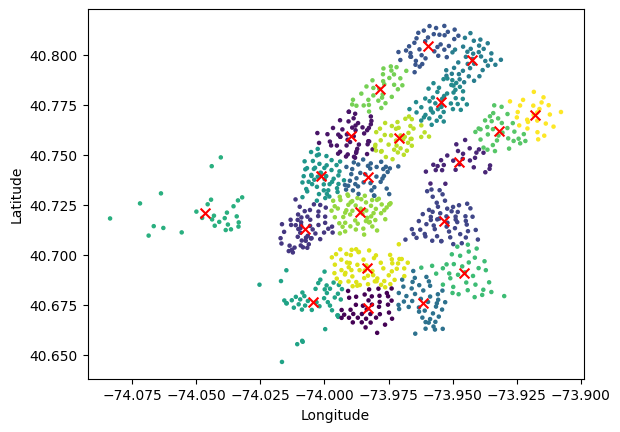

In [22]:
# plot with cluster colour & centriods
plt.scatter(coords_end[:,0], coords_end[:,1], c=kmeans.labels_, s=5)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', marker="x", s=50)
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.show()

In [23]:
# run this cell for coords of starting stations and the fully edited dataframe
coords_start = coords_start_copy.copy()
coords_end = coords_end_copy.copy()
df = df_copy2.copy()
print(df.shape) # to check if no data loss, should be (17548339, 15)
df.head()


(17545760, 15)


,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,gender,usertype_Subscriber,drop_label,pick_label
trip_id,,,,,,,,,,,,,,,
0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,1992,1,1,1,1
1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,1969,1,1,1,1
2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,1956,1,1,1,1
3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,1974,1,1,1,1
4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,1992,1,1,15,1


## Part 2

We need to predict the following

In [66]:
df = df_copy2.copy()
# find n largest pick cluster, randomly chose pick label over drop label
n = 5
largest_cluster = df['pick_label'].value_counts().nlargest(n).index[:n]
print(largest_cluster)
# get all rows with largest cluster 
df = df[df['pick_label'].isin(largest_cluster)]


Index([10, 1, 16, 6, 3], dtype='int32', name='pick_label')


In [67]:
df.head()

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,gender,usertype_Subscriber,drop_label,pick_label
trip_id,,,,,,,,,,,,,,,
0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,1992,1,1,1,1
1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,1969,1,1,1,1
2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,1956,1,1,1,1
3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,1974,1,1,1,1
4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,1992,1,1,15,1


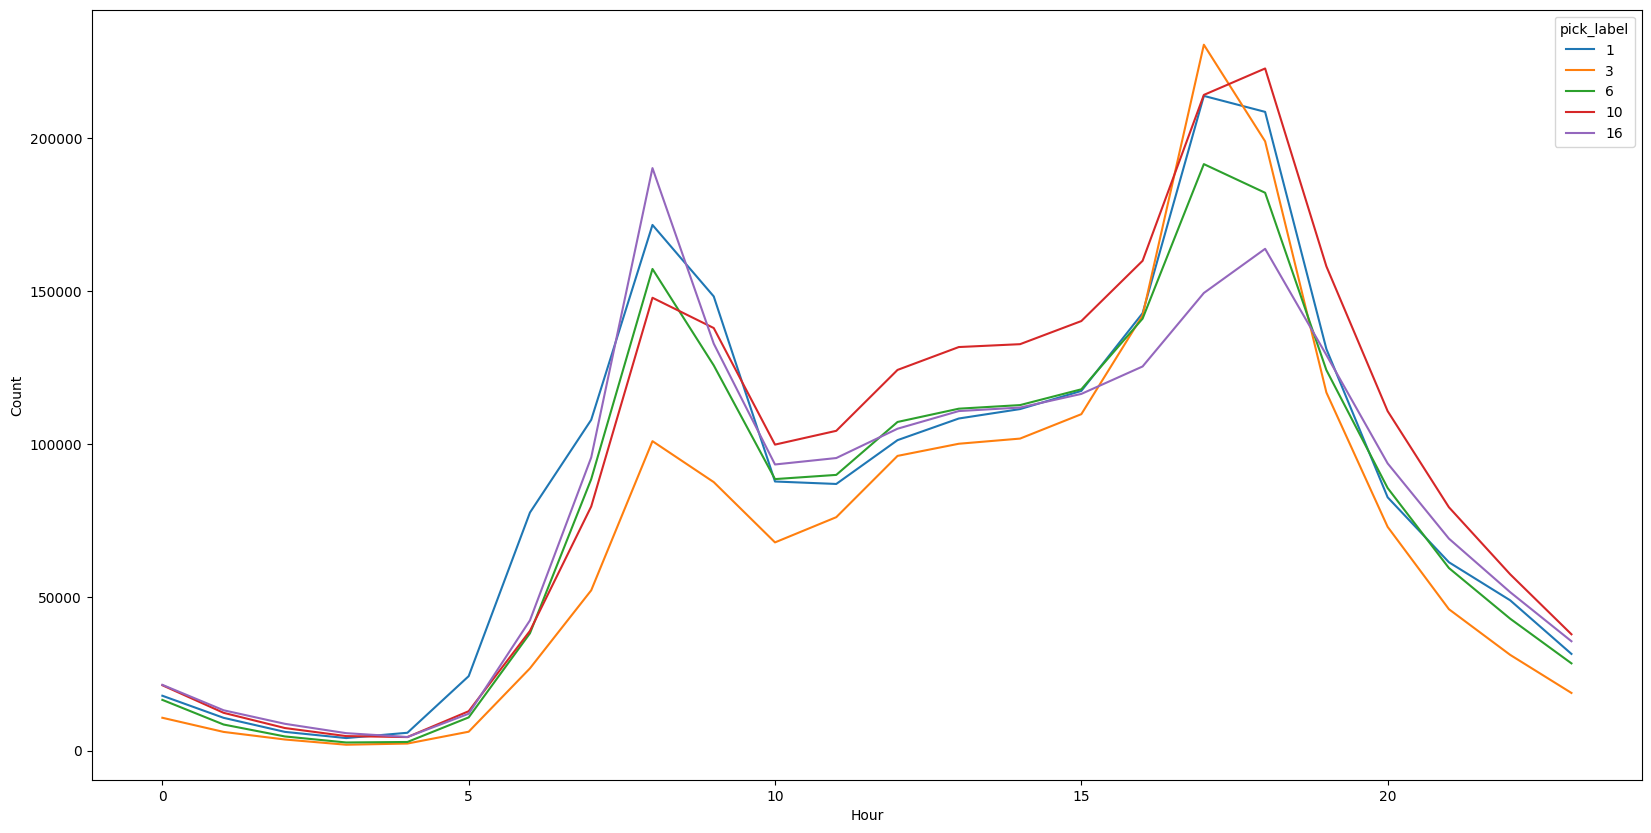

In [68]:
# 1st plot amount of predictions per hour per cluster
grouby_label = df.groupby(['pick_label', df['starttime'].dt.hour]).size().reset_index(name='count')
grouby_label = grouby_label.pivot(index='starttime', columns='pick_label', values='count')
grouby_label.plot(figsize=(20,10), legend=True)
plt.ylabel('Count')
plt.xlabel('Hour')
plt.show()

Start by splitting up the dataset. Necessary because how are you going to aggregate the data by hour if each datapoint has 2 temporal parameters (start and end station times). Note that we can only use the hour and cluster as input to our model, as these are the only variables we have certain information on for the future datapoints for which we predict the demand, so we only have to copy these variables over in the new datasets. 

In [69]:
df_departures = df[['starttime', 'pick_label']].copy()
df_arrivals = df[['stoptime', 'drop_label']].copy()

# rename label columns
df_departures.rename(columns={'pick_label':'label'}, inplace=True)
df_arrivals.rename(columns={'drop_label':'label'}, inplace=True)

# Extract date and time components
def extract_date_time_components(df, time_column):
    df['hour'] = df[time_column].dt.hour
    df['day'] = df[time_column].dt.day
    df['month'] = df[time_column].dt.month
    df.drop(columns=[time_column], inplace=True)

extract_date_time_components(df_departures, 'starttime')
extract_date_time_components(df_arrivals, 'stoptime')

# Remove trip_id index
df_departures.reset_index(drop=True, inplace=True)
df_arrivals.reset_index(drop=True, inplace=True)

# Count the number of rows with the same label, hour, and save it in a new column
def count(df):
    counts = df.groupby(['label', 'hour']).size().reset_index(name='count')
    df = df.merge(counts, on=['label', 'hour'], how='left')
    return df



df_departures = count(df_departures)
df_arrivals = count(df_arrivals)

note: days close to eachother being linked in prediction is already included in the model as you have days and months in your model. And i dont think that it matters that i split up days and months (my guess what taht the model believes the first day of each month is closely related which it isnt. But the month is also included, nevertheless it is a fair thought. Maybe it is better to include the day and month as a counter instead, this will avoid the first day of each month being related! (as yes the months differentiate them, but the first of jun is still close in dist to the first of jan in my method, while with a continuous counter this would really not be the case. Change later

In [70]:
df_arrivals.head()

,label,hour,day,month,count
0,1,14,1,1,81873
1,1,15,1,1,87927
2,1,15,1,1,87927
3,1,15,1,1,87927
4,15,18,1,1,35227


In [71]:
df_departures.head()

,label,hour,day,month,count
0,1,13,1,1,108387
1,1,15,1,1,117382
2,1,15,1,1,117382
3,1,15,1,1,117382
4,1,18,1,1,208435


In [30]:
# function to split data into train and test set train if month < 11, test if month >= 11
def split_train_test(df):
    df_train = df[df['month'] < 11]
    df_test = df[df['month'] >= 11]
    return df_train, df_test

# function to split x and y data, month did not work well as a feature, so it was removed
def create_x_y(df):
    x = df[['hour', 'day', 'label']].values
    y = df['count'].values
    return x, y


In [31]:
# split data
df_departures_train, df_departures_test = split_train_test(df_departures)
df_arrivals_train, df_arrivals_test = split_train_test(df_arrivals)

# split data per label for n
for i in range(n):
    globals()['df_departures_train_{}'.format(i)] = df_departures_train[df_departures_train['label'] == largest_cluster[i]]
    globals()['df_departures_test_{}'.format(i)] = df_departures_test[df_departures_test['label'] == largest_cluster[i]]
    globals()['df_arrivals_train_{}'.format(i)] = df_arrivals_train[df_arrivals_train['label'] == largest_cluster[i]]
    globals()['df_arrivals_test_{}'.format(i)] = df_arrivals_test[df_arrivals_test['label'] == largest_cluster[i]]

    # split x and y 
    globals()['x_departures_train_{}'.format(i)], globals()['y_departures_train_{}'.format(i)] = create_x_y(globals()['df_departures_train_{}'.format(i)])
    globals()['x_departures_test_{}'.format(i)], globals()['y_departures_test_{}'.format(i)] = create_x_y(globals()['df_departures_test_{}'.format(i)])
    globals()['x_arrivals_train_{}'.format(i)], globals()['y_arrivals_train_{}'.format(i)] = create_x_y(globals()['df_arrivals_train_{}'.format(i)])
    globals()['x_arrivals_test_{}'.format(i)], globals()['y_arrivals_test_{}'.format(i)] = create_x_y(globals()['df_arrivals_test_{}'.format(i)])
    

In [32]:
# show x data
x_departures_train_0

array([[ 1,  1, 10],
       [ 1,  1, 10],
       [ 9,  1, 10],
       ...,
       [23, 31, 10],
       [23, 31, 10],
       [ 1, 31, 10]])

r^2 score for departures label 10: 0.14638714606838743
r^2 score for arrivals label 10: 0.11195694448047366
r^2 score for departures label 1: 0.04393119397882472
r^2 score for arrivals label 1: 0.1452324757796627
r^2 score for departures label 16: -0.00013094716949013652
r^2 score for arrivals label 16: 0.30158469957601597
r^2 score for departures label 6: 0.05106847340203624
r^2 score for arrivals label 6: 0.03631138687260094
r^2 score for departures label 3: 0.20937834552258938
r^2 score for arrivals label 3: 0.0009633002680498048


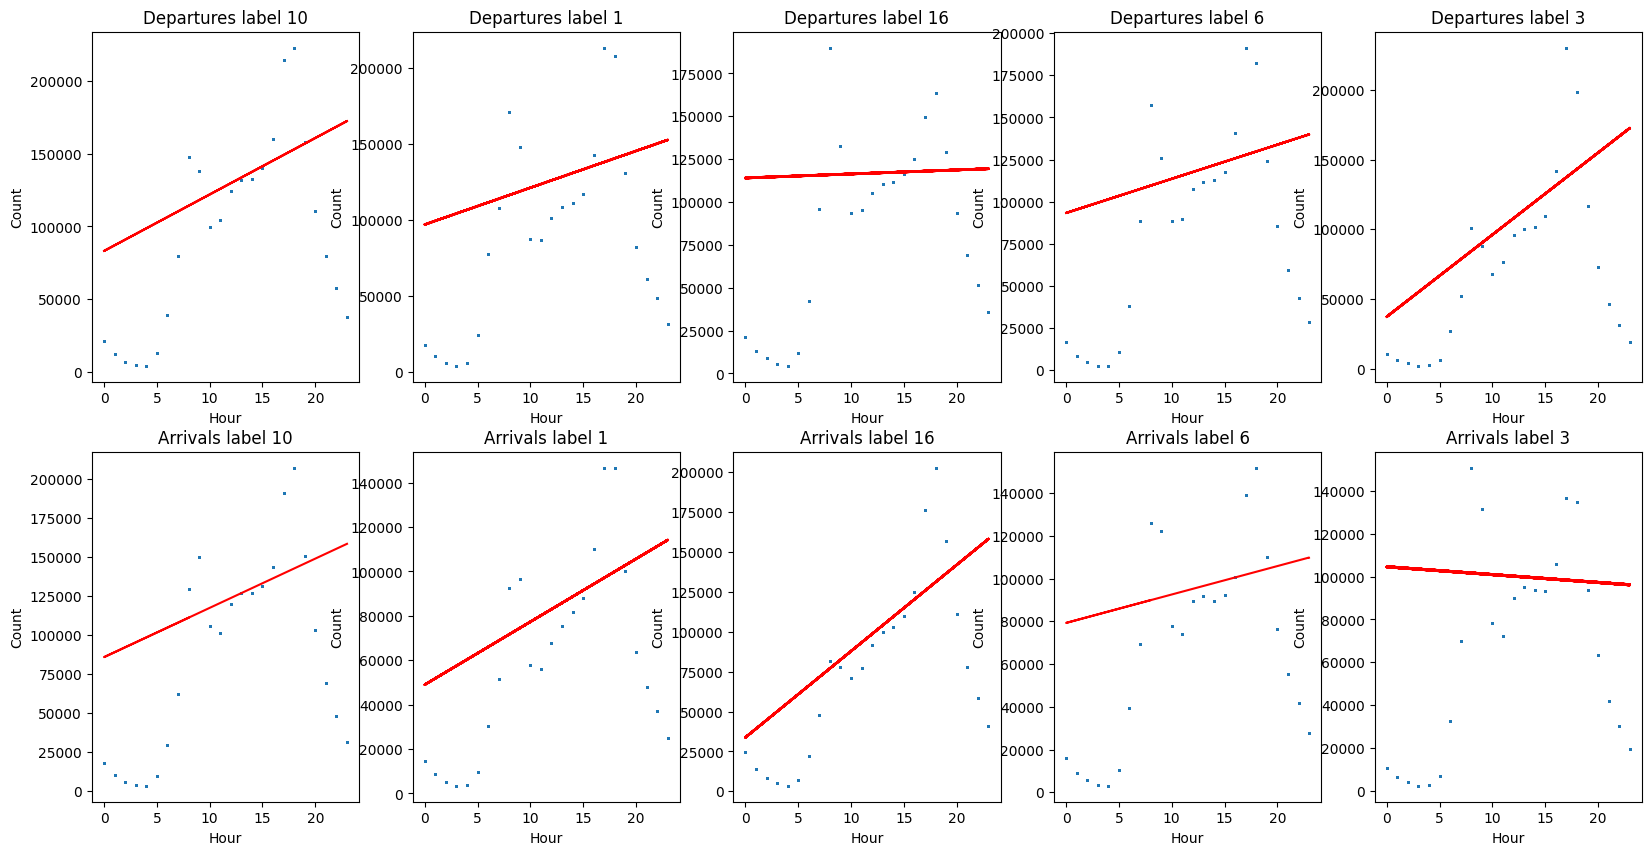

In [33]:
# train lin reg model per label

from sklearn.linear_model import LinearRegression
# r^2 score
from sklearn.metrics import r2_score

for i in range(n):
    globals()['reg_departures_{}'.format(i)] = LinearRegression().fit(globals()['x_departures_train_{}'.format(i)], globals()['y_departures_train_{}'.format(i)])
    globals()['reg_arrivals_{}'.format(i)] = LinearRegression().fit(globals()['x_arrivals_train_{}'.format(i)], globals()['y_arrivals_train_{}'.format(i)])

    # print r^2 score
    print('r^2 score for departures label {}: {}'.format(largest_cluster[i], r2_score(globals()['y_departures_test_{}'.format(i)], globals()['reg_departures_{}'.format(i)].predict(globals()['x_departures_test_{}'.format(i)]))))
    print('r^2 score for arrivals label {}: {}'.format(largest_cluster[i], r2_score(globals()['y_arrivals_test_{}'.format(i)], globals()['reg_arrivals_{}'.format(i)].predict(globals()['x_arrivals_test_{}'.format(i)]))))

# plot in grid
fig, axs = plt.subplots(2, n, figsize=(20,10))
for i in range(n):
    axs[0, i].scatter(globals()['x_departures_test_{}'.format(i)][:,0], globals()['y_departures_test_{}'.format(i)], s=0.75)
    axs[0, i].plot(globals()['x_departures_test_{}'.format(i)][:,0], globals()['reg_departures_{}'.format(i)].predict(globals()['x_departures_test_{}'.format(i)]), color='red')
    axs[0, i].set_title('Departures label {}'.format(largest_cluster[i]))
    axs[0, i].set_ylabel('Count')
    axs[0, i].set_xlabel('Hour')
    axs[1, i].scatter(globals()['x_arrivals_test_{}'.format(i)][:,0], globals()['y_arrivals_test_{}'.format(i)], s=0.75)
    axs[1, i].plot(globals()['x_arrivals_test_{}'.format(i)][:,0], globals()['reg_arrivals_{}'.format(i)].predict(globals()['x_arrivals_test_{}'.format(i)]), color='red')
    axs[1, i].set_title('Arrivals label {}'.format(largest_cluster[i]))
    axs[1, i].set_ylabel('Count')
    axs[1, i].set_xlabel('Hour')


Add polynomials to increase r^2

In [34]:
def add_polynomial(x_data, n):
    x_data_poly = x_data.copy()
    for i in range(2, n+1):
        x_data_poly = np.concatenate((x_data_poly, np.power(x_data, i)), axis=1)
    return x_data_poly

In [35]:
# add polynomial features
for i in range(n):
    globals()['x_departures_train_{}_poly'.format(i)] = add_polynomial(globals()['x_departures_train_{}'.format(i)], 50)
    globals()['x_departures_test_{}_poly'.format(i)] = add_polynomial(globals()['x_departures_test_{}'.format(i)], 50)
    globals()['x_arrivals_train_{}_poly'.format(i)] = add_polynomial(globals()['x_arrivals_train_{}'.format(i)], 10)
    globals()['x_arrivals_test_{}_poly'.format(i)] = add_polynomial(globals()['x_arrivals_test_{}'.format(i)], 10)

# train lin reg model per label with polynomial features

for i in range(n):
    globals()['reg_departures_{}_poly'.format(i)] = LinearRegression().fit(globals()['x_departures_train_{}_poly'.format(i)], globals()['y_departures_train_{}'.format(i)])
    globals()['reg_arrivals_{}_poly'.format(i)] = LinearRegression().fit(globals()['x_arrivals_train_{}_poly'.format(i)], globals()['y_arrivals_train_{}'.format(i)])

    # print r^2 score
    print('r^2 score for departures label {}: {}'.format(largest_cluster[i], r2_score(globals()['y_departures_test_{}'.format(i)], globals()['reg_departures_{}_poly'.format(i)].predict(globals()['x_departures_test_{}_poly'.format(i)]))))
    print('r^2 score for arrivals label {}: {}'.format(largest_cluster[i], r2_score(globals()['y_arrivals_test_{}'.format(i)], globals()['reg_arrivals_{}_poly'.format(i)].predict(globals()['x_arrivals_test_{}_poly'.format(i)]))))



r^2 score for departures label 10: 1.0
r^2 score for arrivals label 10: 0.7858278461229731
r^2 score for departures label 1: 1.0
r^2 score for arrivals label 1: 0.8196100830329137
r^2 score for departures label 16: 1.0
r^2 score for arrivals label 16: 0.8880998328014024
r^2 score for departures label 6: 1.0
r^2 score for arrivals label 6: 0.7243474762476744
r^2 score for departures label 3: 1.0
r^2 score for arrivals label 3: 0.630273274916248


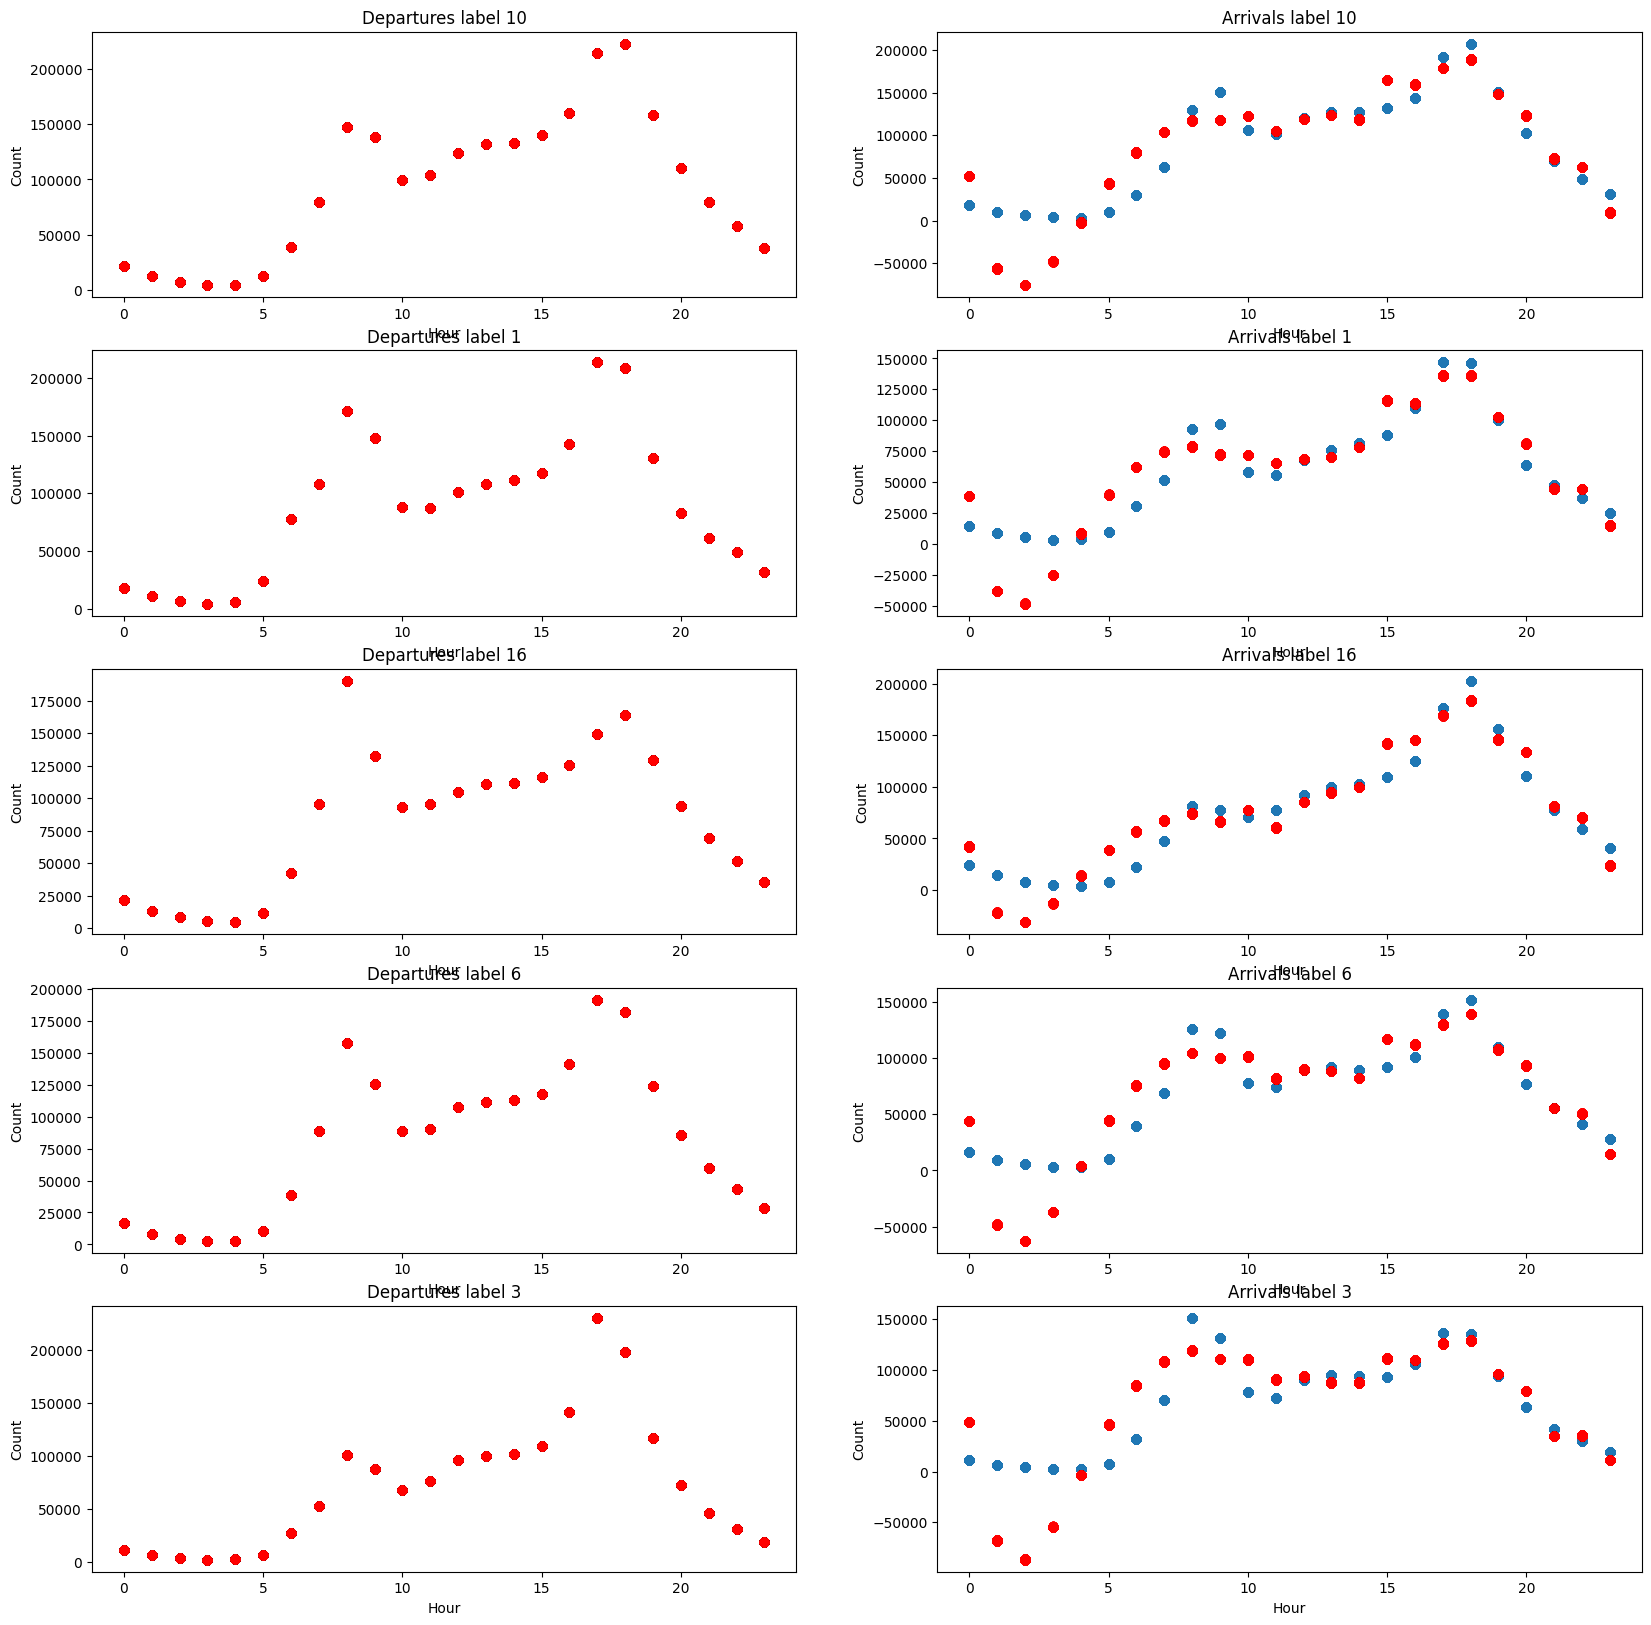

In [36]:
# plot
fig, axs = plt.subplots(n, 2, figsize=(20,20))
for i in range(n):
    axs[i, 0].scatter(globals()['x_departures_test_{}'.format(i)][:,0], globals()['y_departures_test_{}'.format(i)])
    axs[i, 0].scatter(globals()['x_departures_test_{}'.format(i)][:,0], globals()['reg_departures_{}_poly'.format(i)].predict(globals()['x_departures_test_{}_poly'.format(i)]), color='red')
    axs[i, 0].set_title('Departures label {}'.format(largest_cluster[i]))
    axs[i, 0].set_ylabel('Count')
    axs[i, 0].set_xlabel('Hour')
    axs[i, 1].scatter(globals()['x_arrivals_test_{}'.format(i)][:,0], globals()['y_arrivals_test_{}'.format(i)])
    axs[i, 1].scatter(globals()['x_arrivals_test_{}'.format(i)][:,0], globals()['reg_arrivals_{}_poly'.format(i)].predict(globals()['x_arrivals_test_{}_poly'.format(i)]), color='red')
    axs[i, 1].set_title('Arrivals label {}'.format(largest_cluster[i]))
    axs[i, 1].set_ylabel('Count')
    axs[i, 1].set_xlabel('Hour')



Add lag to increase r^2 

In [37]:
# lag features
def add_lag_features(df, n):
    df_lag = df.copy()
    for i in range(1, n+1):
        df_lag['lag_{}'.format(i)] = df_lag['count'].shift(i)
    df_lag.dropna(inplace=True)
    return df_lag

In [38]:
# add 3 lag features
for i in range(n):
    globals()['df_departures_train_{}_lag'.format(i)] = add_lag_features(globals()['df_departures_train_{}'.format(i)], 3)
    globals()['df_departures_test_{}_lag'.format(i)] = add_lag_features(globals()['df_departures_test_{}'.format(i)], 3)
    globals()['df_arrivals_train_{}_lag'.format(i)] = add_lag_features(globals()['df_arrivals_train_{}'.format(i)], 3)
    globals()['df_arrivals_test_{}_lag'.format(i)] = add_lag_features(globals()['df_arrivals_test_{}'.format(i)], 3)

In [39]:
# split x and y data
for i in range(n):
    globals()['x_departures_train_{}_lag'.format(i)], globals()['y_departures_train_{}_lag'.format(i)] = create_x_y(globals()['df_departures_train_{}_lag'.format(i)])
    globals()['x_departures_test_{}_lag'.format(i)], globals()['y_departures_test_{}_lag'.format(i)] = create_x_y(globals()['df_departures_test_{}_lag'.format(i)])
    globals()['x_arrivals_train_{}_lag'.format(i)], globals()['y_arrivals_train_{}_lag'.format(i)] = create_x_y(globals()['df_arrivals_train_{}_lag'.format(i)])
    globals()['x_arrivals_test_{}_lag'.format(i)], globals()['y_arrivals_test_{}_lag'.format(i)] = create_x_y(globals()['df_arrivals_test_{}_lag'.format(i)])

# add poly 6 features
for i in range(n):
    globals()['x_departures_train_{}_lag'.format(i)] = add_polynomial(globals()['x_departures_train_{}_lag'.format(i)], 6)
    globals()['x_departures_test_{}_lag'.format(i)] = add_polynomial(globals()['x_departures_test_{}_lag'.format(i)], 6)
    globals()['x_arrivals_train_{}_lag'.format(i)] = add_polynomial(globals()['x_arrivals_train_{}_lag'.format(i)], 6)
    globals()['x_arrivals_test_{}_lag'.format(i)] = add_polynomial(globals()['x_arrivals_test_{}_lag'.format(i)], 6)

# train lin reg model per label with lag features
for i in range(n):
    globals()['reg_departures_{}_lag'.format(i)] = LinearRegression().fit(globals()['x_departures_train_{}_lag'.format(i)], globals()['y_departures_train_{}_lag'.format(i)])
    globals()['reg_arrivals_{}_lag'.format(i)] = LinearRegression().fit(globals()['x_arrivals_train_{}_lag'.format(i)], globals()['y_arrivals_train_{}_lag'.format(i)])

    # print r^2 score
    print('r^2 score for departures label {}: {}'.format(largest_cluster[i], r2_score(globals()['y_departures_test_{}_lag'.format(i)], globals()['reg_departures_{}_lag'.format(i)].predict(globals()['x_departures_test_{}_lag'.format(i)]))))
    print('r^2 score for arrivals label {}: {}'.format(largest_cluster[i], r2_score(globals()['y_arrivals_test_{}_lag'.format(i)], globals()['reg_arrivals_{}_lag'.format(i)].predict(globals()['x_arrivals_test_{}_lag'.format(i)]))))


r^2 score for departures label 10: 0.7904978826824535
r^2 score for arrivals label 10: 0.7526941438002633
r^2 score for departures label 1: 0.7175725337068686
r^2 score for arrivals label 1: 0.7863567910097942
r^2 score for departures label 16: 0.6091619443024088
r^2 score for arrivals label 16: 0.8581386606846867
r^2 score for departures label 6: 0.7307565674385992
r^2 score for arrivals label 6: 0.6841093776645634
r^2 score for departures label 3: 0.7779462389521548
r^2 score for arrivals label 3: 0.6049221397779506


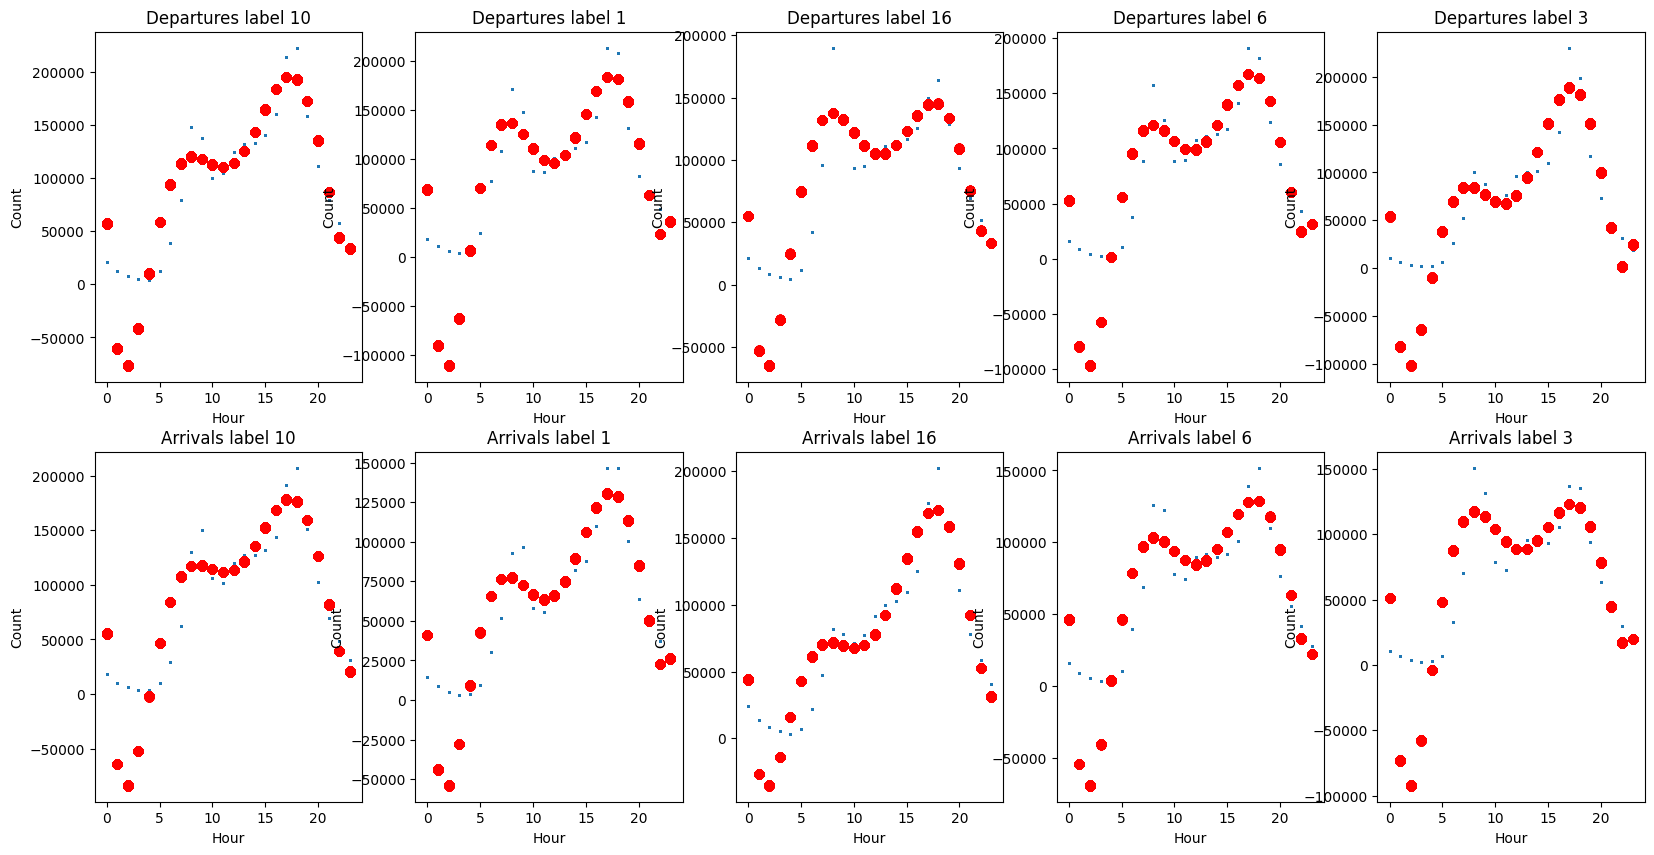

In [40]:
# plot
fig, axs = plt.subplots(2, n, figsize=(20,10))
for i in range(n):
    axs[0, i].scatter(globals()['x_departures_test_{}_lag'.format(i)][:,0], globals()['y_departures_test_{}_lag'.format(i)], s=1)
    axs[0, i].scatter(globals()['x_departures_test_{}_lag'.format(i)][:,0], globals()['reg_departures_{}_lag'.format(i)].predict(globals()['x_departures_test_{}_lag'.format(i)]), color='red')
    axs[0, i].set_title('Departures label {}'.format(largest_cluster[i]))
    axs[0, i].set_ylabel('Count')
    axs[0, i].set_xlabel('Hour')
    axs[1, i].scatter(globals()['x_arrivals_test_{}_lag'.format(i)][:,0], globals()['y_arrivals_test_{}_lag'.format(i)], s=1)
    axs[1, i].scatter(globals()['x_arrivals_test_{}_lag'.format(i)][:,0], globals()['reg_arrivals_{}_lag'.format(i)].predict(globals()['x_arrivals_test_{}_lag'.format(i)]), color='red')
    axs[1, i].set_title('Arrivals label {}'.format(largest_cluster[i]))
    axs[1, i].set_ylabel('Count')
    axs[1, i].set_xlabel('Hour')


Lag doesn't really help so shouldn't include

## Part 3



In [77]:
df = df_copy2.copy()

#do same manipulations on df as done previously for the 5 largest clusters, but this time for all clusters
df_departures = df[['starttime', 'pick_label']].copy()
df_arrivals = df[['stoptime', 'drop_label']].copy()

# rename label columns
df_departures.rename(columns={'pick_label':'label'}, inplace=True)
df_arrivals.rename(columns={'drop_label':'label'}, inplace=True)

# Extract date and time components
def extract_date_time_components(df, time_column):
    df['hour'] = df[time_column].dt.hour
    df['day'] = df[time_column].dt.day
    df['month'] = df[time_column].dt.month
    df.drop(columns=[time_column], inplace=True)

extract_date_time_components(df_departures, 'starttime')
extract_date_time_components(df_arrivals, 'stoptime')

# Remove trip_id index
df_departures.reset_index(drop=True, inplace=True)
df_arrivals.reset_index(drop=True, inplace=True)

# Count the number of rows with the same label, hour, and save it in a new column
def count(df):
    counts = df.groupby(['label', 'hour']).size().reset_index(name='count')
    df = df.merge(counts, on=['label', 'hour'], how='left')
    return df
df_departures = count(df_departures)
df_arrivals = count(df_arrivals)

df_departures_copy = df_departures.copy()
df_arrivals_copy = df_arrivals.copy()

In [78]:
#check we have included all clusters
print(np.sort(df_arrivals.label.unique()))
print(np.sort(df_departures.label.unique()))



[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19]


notice that cluster 12 is the group of red outliers in the map of all end stations, apparently this cluster only has arrivals and no departures. As a consequence, no bikes have to be moved to stations within this cluster, and the cluster can be ignored for this section. 

In [79]:
df_departures = df_departures[df_departures['label'] != 12]
df_arrivals = df_arrivals[df_arrivals['label'] != 12]
print(np.sort(df_arrivals.label.unique()))
print(np.sort(df_departures.label.unique()))

[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19]
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19]


Similarly to the method presented in the previous section, we will train prediction models to predict he change in arrivals and departures over the course of time. This time, however, models for all the relevant clusters will have to be trained. The method will be similar however. 

In [80]:
# include all relevant clusters
n = 19

# redifine largest cluster
largest_cluster = df['pick_label'].value_counts().nlargest(n).index[:n]
print(largest_cluster)

# split data
df_departures_train, df_departures_test = split_train_test(df_departures)
df_arrivals_train, df_arrivals_test = split_train_test(df_arrivals)

# split data per label for n
for i in range(n):
    globals()['df_departures_train_{}'.format(i)] = df_departures_train[df_departures_train['label'] == largest_cluster[i]]
    globals()['df_departures_test_{}'.format(i)] = df_departures_test[df_departures_test['label'] == largest_cluster[i]]
    globals()['df_arrivals_train_{}'.format(i)] = df_arrivals_train[df_arrivals_train['label'] == largest_cluster[i]]
    globals()['df_arrivals_test_{}'.format(i)] = df_arrivals_test[df_arrivals_test['label'] == largest_cluster[i]]

    # split x and y 
    globals()['x_departures_train_{}'.format(i)], globals()['y_departures_train_{}'.format(i)] = create_x_y(globals()['df_departures_train_{}'.format(i)])
    globals()['x_departures_test_{}'.format(i)], globals()['y_departures_test_{}'.format(i)] = create_x_y(globals()['df_departures_test_{}'.format(i)])
    globals()['x_arrivals_train_{}'.format(i)], globals()['y_arrivals_train_{}'.format(i)] = create_x_y(globals()['df_arrivals_train_{}'.format(i)])
    globals()['x_arrivals_test_{}'.format(i)], globals()['y_arrivals_test_{}'.format(i)] = create_x_y(globals()['df_arrivals_test_{}'.format(i)])

Index([10, 1, 16, 6, 3, 17, 18, 15, 4, 9, 5, 0, 7, 8, 11, 13, 2, 14, 19], dtype='int32', name='pick_label')


In [81]:
# add polynomial features
n_poly = 10
for i in range(n):
    globals()['x_departures_train_{}_poly'.format(i)] = add_polynomial(globals()['x_departures_train_{}'.format(i)], n_poly)
    globals()['x_departures_test_{}_poly'.format(i)] = add_polynomial(globals()['x_departures_test_{}'.format(i)], n_poly)
    globals()['x_arrivals_train_{}_poly'.format(i)] = add_polynomial(globals()['x_arrivals_train_{}'.format(i)], n_poly)
    globals()['x_arrivals_test_{}_poly'.format(i)] = add_polynomial(globals()['x_arrivals_test_{}'.format(i)], n_poly)

# train lin reg model per label with polynomial features
for i in range(n):
    globals()['reg_departures_{}_poly'.format(i)] = LinearRegression().fit(globals()['x_departures_train_{}_poly'.format(i)], globals()['y_departures_train_{}'.format(i)])
    globals()['reg_arrivals_{}_poly'.format(i)] = LinearRegression().fit(globals()['x_arrivals_train_{}_poly'.format(i)], globals()['y_arrivals_train_{}'.format(i)])

    # print r^2 score
    print('r^2 score for departures label {}: {}'.format(largest_cluster[i], r2_score(globals()['y_departures_test_{}'.format(i)], globals()['reg_departures_{}_poly'.format(i)].predict(globals()['x_departures_test_{}_poly'.format(i)]))))
    print('r^2 score for arrivals label {}: {}'.format(largest_cluster[i], r2_score(globals()['y_arrivals_test_{}'.format(i)], globals()['reg_arrivals_{}_poly'.format(i)].predict(globals()['x_arrivals_test_{}_poly'.format(i)]))))

r^2 score for departures label 10: 0.827222170113192
r^2 score for arrivals label 10: 0.7544323384167747
r^2 score for departures label 1: 0.7764349173574457
r^2 score for arrivals label 1: 0.7825651428416721
r^2 score for departures label 16: 0.6380046938107129
r^2 score for arrivals label 16: 0.8800454295990756
r^2 score for departures label 6: 0.777749683837685
r^2 score for arrivals label 6: 0.7042251981431508
r^2 score for departures label 3: 0.857419831545243
r^2 score for arrivals label 3: 0.5990368824917718
r^2 score for departures label 17: 0.8093323652675313
r^2 score for arrivals label 17: 0.6660688240065327
r^2 score for departures label 18: 0.8033719494210595
r^2 score for arrivals label 18: 0.6483018049303149
r^2 score for departures label 15: 0.6135931579910079
r^2 score for arrivals label 15: 0.9055704809109096
r^2 score for departures label 4: 0.7297191655422802
r^2 score for arrivals label 4: 0.842716844388061
r^2 score for departures label 9: 0.6904909417844785
r^2 s

In [82]:
#create a dataframe with new data from january 2019 to variable month, take march 2019 for now, for predicions in the future. 
df_arrivals_future = df_arrivals_copy.copy()
df_departures_future = df_departures_copy.copy()

#remove cluster 12 for same reasons as before
df_arrivals_future = df_arrivals_future[df_arrivals_future['label'] != 12]
df_departures_future = df_departures_future[df_departures_future['label'] != 12]
print(np.sort(df_arrivals_future.label.unique()))
print(np.sort(df_departures_future.label.unique()))

# define amount of months you want to look ahead from jan 2019. 
month_end = 3
df_arrivals_future = df_arrivals_future[df_arrivals_future['month'] <= month_end]
df_departures_future = df_departures_future[df_departures_future['month'] <= month_end]

#get rid of the counts column for the future data, as we will be predicting this
df_arrivals_future.drop(columns=['count'], inplace=True)
df_departures_future.drop(columns=['count'], inplace=True)

#get rid of month column as it is not needed (similarly as before)
df_arrivals_future.drop(columns=['month'], inplace=True)
df_departures_future.drop(columns=['month'], inplace=True)

# split data per label for n
for i in range(n):
    globals()['df_departures_future_{}'.format(i)] = df_departures_future[df_departures_future['label'] == largest_cluster[i]]
    globals()['df_arrivals_future_{}'.format(i)] = df_arrivals_future[df_arrivals_future['label'] == largest_cluster[i]]

#add as many polynomial features as we did for the training data
for i in range(n):
    globals()['df_departures_future_{}_poly'.format(i)] = add_polynomial(globals()['df_departures_future_{}'.format(i)], n_poly)
    globals()['df_arrivals_future_{}_poly'.format(i)] = add_polynomial(globals()['df_arrivals_future_{}'.format(i)], n_poly)


[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19]
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19]


,label,hour,day
0,1,14,1
1,1,15,1
2,1,15,1
3,1,15,1
4,15,18,1


In [84]:
# predict future data
for i in range(n):
    globals()['df_departures_future_{}_poly'.format(i)]['count'] = globals()['reg_departures_{}_poly'.format(i)].predict(globals()['df_departures_future_{}_poly'.format(i)])
    globals()['df_arrivals_future_{}_poly'.format(i)]['count'] = globals()['reg_arrivals_{}_poly'.format(i)].predict(globals()['df_arrivals_future_{}_poly'.format(i)])

# compute the difference between the predicted arrivals and the predicted departures for each cluster per hour and store in new dataframe
for i in range(n):
    globals()['df_arrivals_future_{}_poly'.format(i)]['difference'] = globals()['df_arrivals_future_{}_poly'.format(i)]['count'] - globals()['df_departures_future_{}_poly'.format(i)]['count']

# sum the differences per hour for a specific cluster per day
for i in range(n):
    globals()['df_arrivals_future_{}_poly'.format(i)] = globals()['df_arrivals_future_{}_poly'.format(i)].groupby(['label', 'day']).sum().reset_index()

# print per day for a specific cluster the difference between predicted arrivals and predicted departures
for i in range(n):
    print(globals()['df_arrivals_future_{}_poly'.format(i)].head())
    

# sum 

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [83]:
# if we ever want to predict for multiple years ahead, we can use this, but then we also need to include the year in our model to distinguish between the inputs
# month_end = 3
# if month_end > 12:
#     years = month_end // 12
#     month_end = month_end % 12
# for i in range(years):
#     df_arrivals_future = df_arrivals_future.append(df_arrivals_copy)
#     df_departures_future = df_departures_future.append(df_departures_copy)

# df_arrivals_future = df_arrivals_future.append(df_arrivals_copy[['month'] <= month_end])
# df_departures_future = df_departures_future.append(df_departures_copy[['month'] <= month_end])